# Standard ISLM Model implented in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
class IS:
    
    def __init__(self,a,b,T,G,c,d,XN):
        self.a=a #consumption intercept
        self.b=b #consumption slope
        self.T=T #taxes
        self.G=G #spending
        self.c=c #investment intercept
        self.d=d #investment slope
        self.XN=XN
        
    def r(self,Y):
        intercept=(self.a-self.b*self.T+self.G+self.c+self.XN)/self.d
        slope=(self.b-1)/self.d
        return intercept+slope*Y
        
    def Y(self,r):
        intercept=(self.a-self.b*self.T+self.G+self.c+self.XN)/(1-self.b)
        slope=-self.d/(1-self.b)
        return intercept+slope*r

class LM:
    def __init__(self,M,P,h,f):
        self.M=M #money balance
        self.P=P #price level
        self.h=h #real interest rate sensitivity
        self.f=f #product sensitivity
    
    def r(self,Y):
        intercept=-self.M/(self.h*self.P)
        slope=self.f/self.h
        return intercept+slope*Y
    
    def Y(self,r):
        intercept=self.M/(self.f*self.h)
        slope=self.h/self.f
        return intercept+slope*r

def equilibrium(IS,LM):
    Y_eq=( (IS.a-IS.b*IS.T+IS.G+IS.c)/(1-IS.b) + (IS.d*LM.M)/(1-IS.b)*(LM.h*LM.P) ) / ( 1+(IS.d*LM.f)/(LM.h*(1-IS.b)) )
    r_eq=-LM.M/(LM.h*LM.P) + (LM.f*Y_eq)/LM.h
    return Y_eq,r_eq

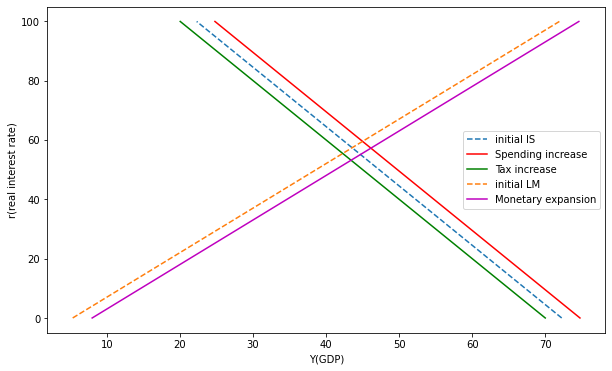

In [4]:
r=np.arange(0,100,0.1)
lm_curve=LM(2,10,0.5,0.75)
Y_lm=lm_curve.Y(r)

#Initial state
initial_is=IS(20,0.2,1,8,10,0.4,20)
Y1=initial_is.Y(r)

#Spending increase
second_is=IS(20,0.2,1,10,10,0.4,20)
Y2=second_is.Y(r)

#Tax increase
third_is=IS(20,0.2,10,8,10,0.4,20)
Y3=third_is.Y(r)

#Money supply increase
second_lm=LM(3,10,0.5,0.75)
Y2_lm=second_lm.Y(r)

fig,axes=plt.subplots(1,1,figsize=(10,6))
axes.set_xlabel('Y(GDP)')
axes.set_ylabel('r(real interest rate)')
axes.plot(Y1,r,'--',label='initial IS')
axes.plot(Y2,r,'r',label='Spending increase')
axes.plot(Y3,r,'g',label='Tax increase')
axes.plot(Y_lm,r,'--',label='initial LM')
axes.plot(Y2_lm,r,'m',label='Monetary expansion')
axes.legend(loc=0)